# 處理異常值

在統計學中，異常值是一個明顯不同於其他觀測值的數據點。異常值可能是由測量的變異性引起的，也可能表示實驗誤差；後者有時會從數據集中排除。異常值可能會在統計分析中引起嚴重問題。

記住，即使數據點是異常值，它仍然是一個數據點！在決定是否移除異常值時，請仔細考慮你的數據、其來源以及你的目標。每個情況都是不同的！

## 課程目標
* 了解異常值的不同數學定義
* 使用 Python 工具來識別和移除異常值

In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Generating Data
## 投票人選
def create_ages(mu=50,sigma=13,num_samples=100,seed=42):

    # Set a random seed in the same cell as the random call to get the same values as us
    # We set seed to 42 (42 is an arbitrary choice from Hitchhiker's Guide to the Galaxy)
    np.random.seed(seed)
#loc 常態分布均值
#scale 標準差  
    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)
    
    return sample_ages

In [423]:
sample = create_ages()

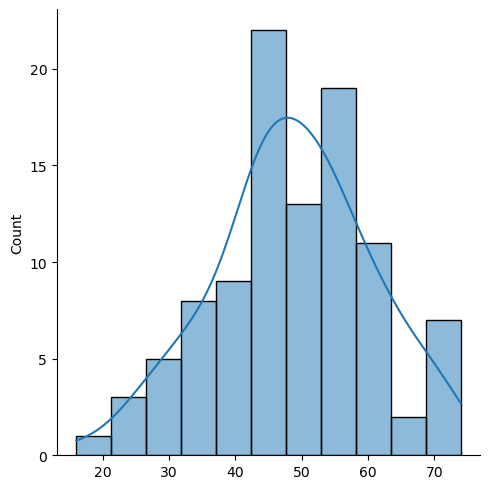

In [424]:
sns.displot(sample,kde="True")

<Axes: >

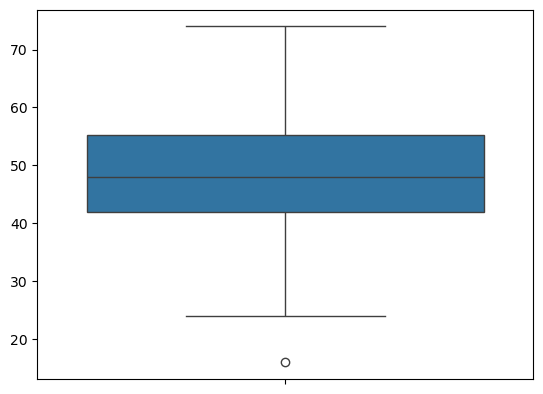

In [425]:
sns.boxplot(sample)

In [426]:
ser = pd.Series(sample)
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [427]:
def fix_values(age):
    if age < 18:
        return 18
    else:
        return age

In [428]:
ser = ser.apply(fix_values)
ser.describe()

count    100.000000
mean      48.680000
std       11.766139
min       18.000000
25%       42.000000
50%       48.000000
75%       55.250000
max       74.000000
dtype: float64

In [429]:
df = pd.read_csv("Ames_Housing_Data.csv")
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [430]:
df["Overall Qual"].unique()

array([ 6,  5,  7,  8,  9,  4,  3,  2, 10,  1], dtype=int64)

In [431]:
number_df = df.select_dtypes(include=[np.number])
number_df.corr()["SalePrice"].sort_values(ascending=False)


SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

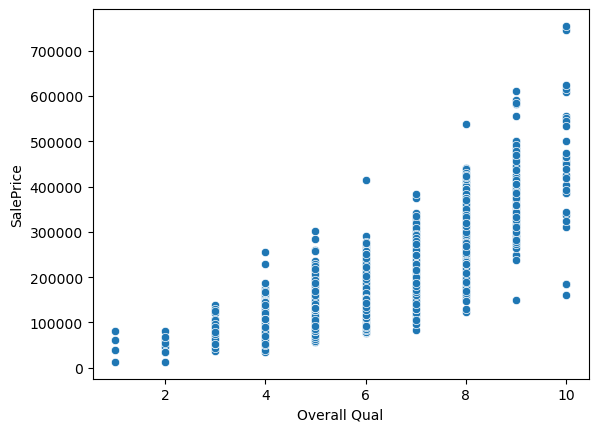

In [432]:
sns.scatterplot(x="Overall Qual",y="SalePrice",data=df)

In [433]:
df[(df["Overall Qual"] > 8) & (df["SalePrice"] < 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

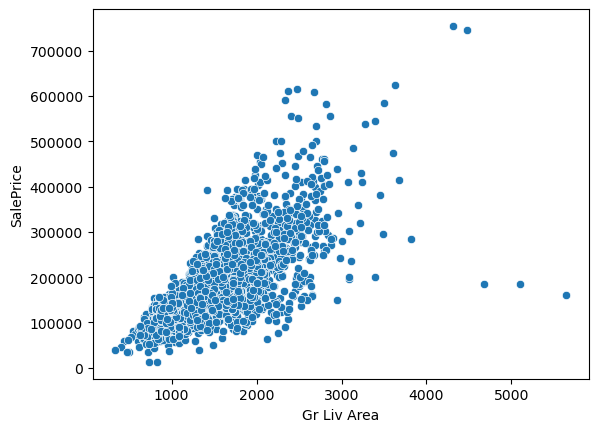

In [434]:
sns.scatterplot(x="Gr Liv Area",y="SalePrice",data=df)

In [435]:
df[(df["Gr Liv Area"] > 4000) & (df["SalePrice"] < 400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

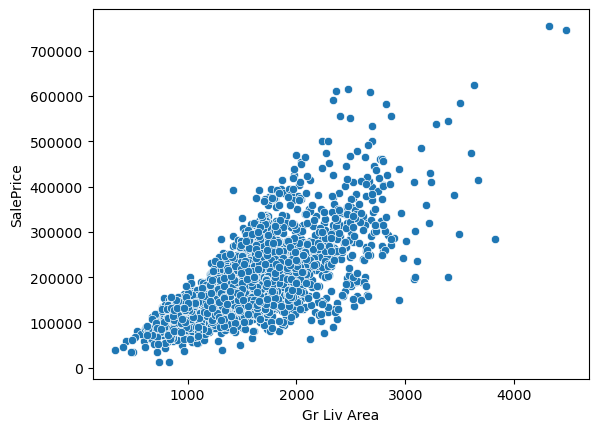

In [436]:
indx_drop = df[(df["Gr Liv Area"] > 4000) & (df["SalePrice"] < 400000)].index
df = df.drop(indx_drop,axis=0)
sns.scatterplot(x="Gr Liv Area",y="SalePrice",data=df)

In [437]:
drop_qual =  df[(df["Overall Qual"] > 8) & (df["SalePrice"] < 200000)].index

In [438]:
df.drop(drop_qual,axis=0,inplace=True)

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

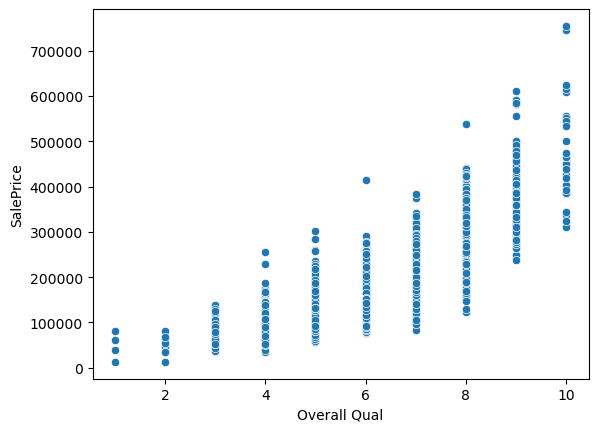

In [439]:

sns.scatterplot(x="Overall Qual",y="SalePrice",data=df)

In [440]:
df.to_csv("./new_Ames_Housing_Data.csv")

## 遺失值處理

In [441]:
df = pd.read_csv("./Ames_outliers_removed.csv")
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [443]:
#null值佔的百本比
100 * df.isnull().sum() / len(df)


PID                0.00000
MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 81, dtype: float64

In [444]:
df = df.drop("PID",axis=1)

In [445]:
def percent_missing(df:pd.DataFrame)->pd.Series:
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values(ascending=False)
    return percent_nan


In [446]:
percent_nan = percent_missing(df)
print(percent_nan)
print(type(percent_nan))

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Mas Vnr Type      60.642296
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Cond        5.432183
Garage Qual        5.432183
Garage Finish      5.432183
Garage Yr Blt      5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
Bsmt Cond          2.733174
Bsmt Qual          2.733174
BsmtFin Type 1     2.733174
Mas Vnr Area       0.785787
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
BsmtFin SF 1       0.034165
Garage Cars        0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 2       0.034165
Electrical         0.034165
dtype: float64
<class 'pandas.core.series.Series'>


In [447]:
percent_nan[percent_nan <1]

Mas Vnr Area      0.785787
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
BsmtFin SF 1      0.034165
Garage Cars       0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 2      0.034165
Electrical        0.034165
dtype: float64

數值型地下室欄位包括：

- BsmtFin SF 1：地下室完成面積 1
- BsmtFin SF 2：地下室完成面積 2
- Bsmt Unf SF：地下室未完成面積
- Total Bsmt SF：總地下室面積
- Bsmt Full Bath：地下室全浴室數量
- Bsmt Half Bath：地下室半浴室數量

這些欄位表示與地下室相關的數值型特徵，例如地下室的完成面積、未完成面積、總面積以及地下室的浴室數量。它們用於量化房屋地下室區域的各種方面。

In [448]:
df[df["Total Bsmt SF"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [449]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)
percent_nan = percent_missing(df)
print(percent_nan)


Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Mas Vnr Type      60.642296
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Yr Blt      5.432183
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
BsmtFin Type 1     2.733174
Bsmt Cond          2.733174
Bsmt Qual          2.733174
Mas Vnr Area       0.785787
Electrical         0.034165
Garage Cars        0.034165
Garage Area        0.034165
dtype: float64


字串描述型地下室欄位包括：

- Bsmt Qual：地下室質量
- Bsmt Cond：地下室狀況
- Bsmt Exposure：地下室暴露程度
- BsmtFin Type 1：地下室完成類型 1
- BsmtFin Type 2：地下室完成類型 2

這些欄位描述了地下室的各種特徵，如質量、狀況、暴露程度以及完成類型。它們提供了對房屋地下室的詳細描述。

In [450]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')
percent_nan = percent_missing(df)
print(percent_nan)

Pool QC          99.590024
Misc Feature     96.412709
Alley            93.235395
Fence            80.457807
Mas Vnr Type     60.642296
Fireplace Qu     48.582166
Lot Frontage     16.740690
Garage Yr Blt     5.432183
Garage Finish     5.432183
Garage Qual       5.432183
Garage Cond       5.432183
Garage Type       5.363854
Mas Vnr Area      0.785787
Electrical        0.034165
Garage Cars       0.034165
Garage Area       0.034165
dtype: float64


In [451]:
df.dropna(axis=0,subset=["Electrical",'Garage Cars'],inplace=True)
percent_nan = percent_missing(df)
print(percent_nan)

Pool QC          99.589744
Misc Feature     96.410256
Alley            93.230769
Fence            80.478632
Mas Vnr Type     60.615385
Fireplace Qu     48.547009
Lot Frontage     16.752137
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Garage Type       5.367521
Mas Vnr Area      0.786325
dtype: float64


In [452]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

percent_nan = percent_missing(df)
print(percent_nan)

Pool QC          99.589744
Misc Feature     96.410256
Alley            93.230769
Fence            80.478632
Fireplace Qu     48.547009
Lot Frontage     16.752137
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Garage Type       5.367521
dtype: float64


In [453]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2922,Detchd,Unf,TA,TA
2923,Attchd,Unf,TA,TA
2924,NaN,NaN,NaN,NaN
2925,Attchd,RFn,TA,TA


In [454]:
garage_clors = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[garage_clors]  = df[garage_clors].fillna('None')
df["Garage Yr Blt"] = df["Garage Yr Blt"].fillna(0)

percent_nan = percent_missing(df)
print(percent_nan)

Pool QC         99.589744
Misc Feature    96.410256
Alley           93.230769
Fence           80.478632
Fireplace Qu    48.547009
Lot Frontage    16.752137
dtype: float64


In [455]:
print(type(df))
df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis = 1,inplace=True)
percent_nan = percent_missing(df)
print(percent_nan)

<class 'pandas.core.frame.DataFrame'>
Fireplace Qu    48.547009
Lot Frontage    16.752137
dtype: float64


In [456]:
percent_nan = percent_missing(df)
print(percent_nan)

Fireplace Qu    48.547009
Lot Frontage    16.752137
dtype: float64


In [457]:
df["Fireplace Qu"] = df["Fireplace Qu"].fillna("None")

In [458]:
percent_nan = percent_missing(df)
print(percent_nan)

Lot Frontage    16.752137
dtype: float64


In [461]:
df["Lot Frontage"] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val:val.fillna(val.mean()))
df["Lot Frontage"] = df["Lot Frontage"].fillna(0)
percent_nan = percent_missing(df)
print(percent_nan)


Series([], dtype: float64)
